In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


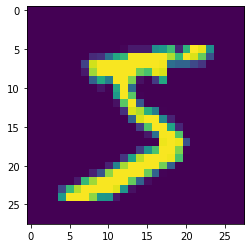

In [4]:
plt.imshow(X_train_full[0])
plt.show();

# Preprocess the data

In [5]:
X_train_full = X_train_full.reshape(X_train_full.shape[0], 28, 28, 1) # each image 28x28 pixels and 1 color channel
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train_full = X_train_full / 255.
X_test = X_test / 255.

X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

y_train = to_categorical(y=y_train, num_classes=10)
y_valid = to_categorical(y=y_valid, num_classes=10)
y_test = to_categorical(y=y_test, num_classes=10)

# Create the model

In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu',input_shape=[28, 28, 1]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [20]:
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2932 - accuracy: 0.9110 - val_loss: 0.1836 - val_accuracy: 0.9479
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2647 - accuracy: 0.9191 - val_loss: 0.1447 - val_accuracy: 0.9581
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2328 - accuracy: 0.9286 - val_loss: 0.1198 - val_accuracy: 0.9644
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2131 - accuracy: 0.9352 - val_loss: 0.1109 - val_accuracy: 0.9673
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1979 - accuracy: 0.9381 - val_loss: 0.1008 - val_accuracy: 0.9718
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1948 - accuracy: 0.9385 - val_loss: 0.0982 - val_accuracy: 0.9723
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1773 - accuracy: 0.9464 - val_loss: 0.0931 - val_accur

In [1]:
model.save('mnist.h5')

In [6]:
from keras.models import load_model

In [7]:
model = load_model('mnist.h5')

In [8]:
print(X_test[0].shape)

(28, 28, 1)


In [9]:
model.predict(X_test[0].reshape((1, 28, 28, 1)))

array([[9.3810897e-13, 3.4168013e-10, 8.0921708e-10, 1.0329958e-07,
        2.4152260e-13, 1.7405687e-12, 2.8812011e-17, 9.9999976e-01,
        9.3485983e-13, 7.1692462e-08]], dtype=float32)

In [10]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


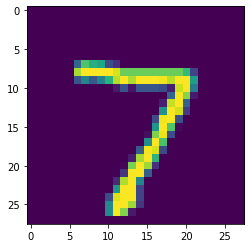

In [11]:
plt.imshow(X_test[0])
# X_test[0]